# Lab 출생률 데이터
- 질병 대책 본부(CDC, Centre for Disease Control)에서 제공하고 자유롭게 사용할 수 있는 미국의 출생률 데이터를 살펴보자. 
- 이 데이터는 아래 URL 에서 다운받을 수 있다.
- https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [18]:
# 데이터 다운로드를 위한 쉘 명령어
# !curl -0 https://raw.githubusercontent.com/jakevdp/data-CDCbirths
# master/births.csv
import numpy as np
import pandas as pd

In [39]:
# 데이터의 Pandas 사용
births=pd.read_csv('births.csv')

In [40]:
print(births)

       year  month   day gender  births
0      1969      1   1.0      F    4046
1      1969      1   1.0      M    4440
2      1969      1   2.0      F    4454
3      1969      1   2.0      M    4548
4      1969      1   3.0      F    4548
5      1969      1   3.0      M    4994
6      1969      1   4.0      F    4440
7      1969      1   4.0      M    4520
8      1969      1   5.0      F    4192
9      1969      1   5.0      M    4198
10     1969      1   6.0      F    4710
11     1969      1   6.0      M    4850
12     1969      1   7.0      F    4646
13     1969      1   7.0      M    5092
14     1969      1   8.0      F    4800
15     1969      1   8.0      M    4934
16     1969      1   9.0      F    4592
17     1969      1   9.0      M    4842
18     1969      1  10.0      F    4852
19     1969      1  10.0      M    5190
20     1969      1  11.0      F    4580
21     1969      1  11.0      M    4598
22     1969      1  12.0      F    4126
23     1969      1  12.0      M    4324


In [41]:
# 데이터 확인해보기


births['decade'] = 10 * (births['year'] // 10)

In [44]:
# 피벗 테이블을 사용해 이 데이터를 좀 더 잘 이해할 수 있다.
# decade 함수로 년도 열을 추가하고, 년도별 남녀의 출생 수를 살펴보자.
births_pivot = births.pivot_table('births', index='year', columns='gender', aggfunc='sum')
print(births_pivot)

gender        F        M
year                    
1969    1753634  1846572
1970    1819164  1918636
1971    1736774  1826774
1972    1592347  1673888
1973    1533102  1613023
1974    1543005  1627626
1975    1535546  1618010
1976    1547613  1628863
1977    1623363  1708796
1978    1626324  1711976
1979    1705837  1793958
1980    1762459  1855522
1981    1772037  1863478
1982    1797239  1888218
1983    1775299  1867522
1984    1791802  1881766
1985    1834774  1930290
1986    1833708  1926987
1987    1860111  1953105
1988    1909210  2004583
1989    1973712  2071981
1990    2030966  2131951
1991    2011601  2103741
1992    1985118  2084310
1993    1953456  2051067
1994    1932234  2024691
1995    1904871  1998141
1996    1902664  1992210
1997    1896928  1987401
1998    1927106  2018086
1999    1934510  2028955
2000    1984255  2079568
2001    1970770  2060761
2002    1966519  2060857
2003    1999387  2096705
2004    2010710  2108197
2005    2022892  2122727
2006    2084957  2188268


Text(0,0.5,'total births per year')

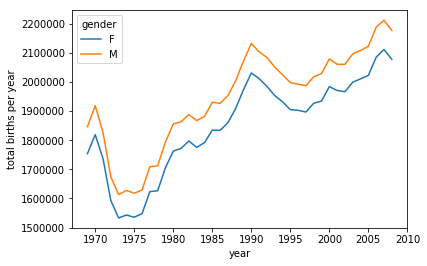

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set() #seaborn스타일 사용
births_pivot.plot()
plt.ylabel('total births per year')

Text(0,0.5,'total births per year')

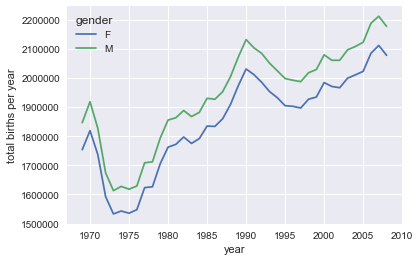

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #seaborn스타일 사용
births_pivot.plot()
plt.ylabel('total births per year')

In [26]:
# 위 부분합 데이터로 연도별 항상 남성의 출생률이 여성의 출생률 보다 높았음을 알 수 있다.
# 이 추세를 더욱 분명하게 확인하기 위해 Pandas의 기본 플로팅 도구를 활용해 연도별 출생 수를 시각화한다.


###### 결과
- 남성 출생률이 항상 여성보다 높음.
- 2007년에 출생률이 가장 높았음.

### 추가 데이터 탐색
- Pandas 도구를 사용해 이 데이터세트에서 뽑아낼 수 있는 몇 가지 흥미로운 특징이 있다.
- 먼저 데이터를 정제해야 한다. (날짜 오타와 누락된 값)으로 인한 이상치를 제거해야 한다.
- 데이터를 한 번에 제거하는 쉬운 방법은 이상치를 제거하는 것으로 시그마 클리핑 연산을 통해 진행한다.

In [51]:
### 이 부분은 이해가 어려울 수 있으니 그냥 실행해 봅니다.
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
# 마지막 줄은 표본 평균의 견고한 추정치로, 0.74는 가우스 분포의 사분위 수에서 비롯한 것이다.
# 이와 함께 query() 메서드를 사용해 이 값에서 벗어난 출생 수를 가진 행을 걸러낼 수 있다.
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [52]:
# 데이터를 확인해본다.
births.tail()

,year,month,day,gender,births,decade
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980
15066,1988,12,31.0,M,4698,1980


In [55]:
# 데이터를 전처리한다.
# 'day' 열을 정수형으로 설정; 원래는 널 값 때문에 문자열이었음.
births['day'] = births['day'].astype(int)
print(births)

       year  month  day gender  births  decade
0      1969      1    1      F    4046    1960
1      1969      1    1      M    4440    1960
2      1969      1    2      F    4454    1960
3      1969      1    2      M    4548    1960
4      1969      1    3      F    4548    1960
5      1969      1    3      M    4994    1960
6      1969      1    4      F    4440    1960
7      1969      1    4      M    4520    1960
8      1969      1    5      F    4192    1960
9      1969      1    5      M    4198    1960
10     1969      1    6      F    4710    1960
11     1969      1    6      M    4850    1960
12     1969      1    7      F    4646    1960
13     1969      1    7      M    5092    1960
14     1969      1    8      F    4800    1960
15     1969      1    8      M    4934    1960
16     1969      1    9      F    4592    1960
17     1969      1    9      M    4842    1960
18     1969      1   10      F    4852    1960
19     1969      1   10      M    5190    1960
20     1969  

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
births.tail()

,year,month,day,gender,births,decade
15062,1988,12,29,M,5944,1980
15063,1988,12,30,F,5742,1980
15064,1988,12,30,M,6095,1980
15065,1988,12,31,F,4435,1980
15066,1988,12,31,M,4698,1980


In [58]:
# 마지막으로 날짜, 월, 연도를 겳합해 Date 인덱스를 생성할 수 있다.
# 이렇게 하면 각 행에 대응하는 요일을 빠르게 계산할 수 있다.
# 년(year), 월(month), 일(day)로부터 날짜(datetime) 인덱스 생성
births.index = pd.to_datetime(10000 * births.year +
                             100 * births.month +
                             births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

In [59]:
# 이 인덱스를 이용해 수십 년 동안의 요일별 출생 수를 그래프로 그릴 수 있다.


import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean')

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


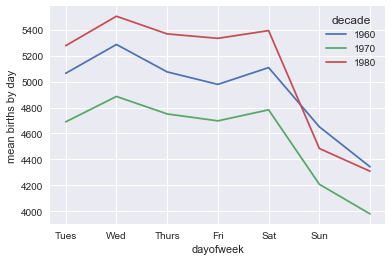

In [60]:
### 수십년 동안의 요일별 출생수를 그래프로 그린다.
# 출생 수가 주중보다 주말에 약간 더 낮은 것을 확인할 수 있다!
# 1990년 대와 2000년 대는 없는데, CDC 데이터가 1989년을 기점으로 태어난 년월만 포함하고 있기 때문이다.
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [61]:
# 또 다른 흥미로운 관점은 연도 내 일별 평균 출생 수를 그래프로 나타내는 것이다.
# 먼저 데이터를 월과 일별로 분류하자.
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
   6   4668.150
   7   4706.925
   8   4629.650
   9   4537.775
   10  4591.700
   11  4675.150
   12  4700.800
   13  4730.050
   14  4816.200
   15  4733.650
   16  4665.025
   17  4654.650
   18  4707.325
   19  4731.525
   20  4767.525
   21  4790.250
   22  4742.800
   23  4666.750
   24  4653.200
   25  4698.000
   26  4715.900
   27  4747.025
   28  4771.800
   29  4702.300
   30  4644.225
...         ...
12 2   4830.300
   3   4758.500
   4   4718.725
   5   4734.675
   6   4683.050
   7   4704.325
   8   4803.800
   9   4793.825
   10  4785.325
   11  4738.500
   12  4791.300
   13  4676.675
   14  4792.100
   15  4920.800
   16  4968.100
   17  4951.600
   18  4936.375
   19  4962.925
   20  4877.025
   21  4816.100
   22  4661.925
   23  4466.675
   24  4126.250
   25  3844.450
   26  4383.525
   27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

In [62]:
# 결과로 월과 일을 인덱스로 가지는 다중 인덱스를 얻게 된다.
# 그래프로 쉽게 표현하기 위해 이 월과 일을 더미 연도 변수와 결합해 연월일의 날짜로 변환해 보자. 2012년만 본다.
# 2월 29일을 올바르게 처리하도록 윤년을 선택해야 한다. 
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]

In [63]:
# 데이터 확인
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


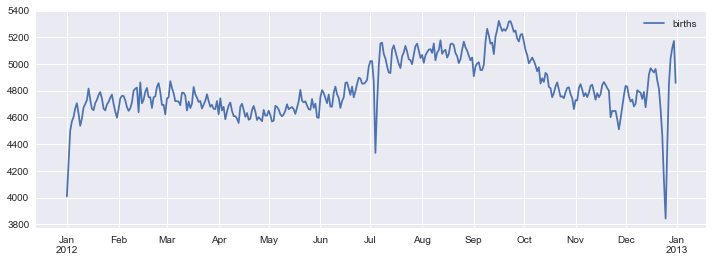

In [64]:
#월과 일에만 초점을 맞춰 이제 해당 연도의 날짜별 평균 출생 수를 나타내는 시계열 데이터가 만들어졌다.
# 이로부터 데이터를 플로팅하기 위해 plot 메서드를 사용할 수 있다.
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

## <결론>
#### 특히 이 그래프에서 확인할 수 있는 놀라운 점은 미국의 휴일(예: 독립 기념일(7/4), 노동절(9월 첫째주 월요일), 추수감사절(11월 넷째주 목요일), 크리스마스(12/25), 새해(1/1)에는 출생률이 급감했다는 것이다.
#### 이 현상은 자연 분만에 대한 깊은 정신적, 신체적 효과라기 보다는 예정 분만 및 유도 분만을 선호했던 경향이 반영된 것으로 보인다.

# Chart

## 1. matplotlib
- matplotlib.pyplot 모듈을 사용한다.
- pyplot은 시각화를 단계별로 간편하게 만들 수 있는 구조로 되어 있다.
- 시각화가 완성되면 savefig()을 통해 그래프를 저장하거나 show()를 사용하여 화면에 띄울 수 있다.

In [3]:
# matplotlib에서 pyplot 모듈을 약어로 "plt"를 사용하여 import 한다.
from matplotlib import pyplot as plt
from collections import defaultdict, Counter

In [4]:
# 10년 단위별 GDP 정보를 입력한다.
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

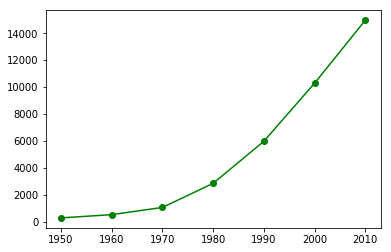

In [11]:
# x축에 연도, y축에 GDP가 있는 선 그래프를 만들자
%matplotlib inline
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

## 2. Bar chart
- 막대 그래프는 이산적인 항목들에 대한 변화를 보여줄 때 사용하면 좋다.
- 여러 영화가 아카데미 시상식에서 상을 각각 몇 개 받았는지 확인해 보자.

In [12]:
# movies에는 영화제목을, num_oscars에는 수상횟수를 저장한다.
# 오스카상 시상한 영화
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

In [13]:
# 막대가 가운데로 올 수 있도록 왼쪽 좌표에 0.5씩 더해 주자.
xs = [i+0.5 for i, _ in enumerate(movies)]

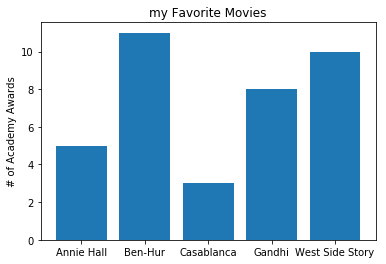

In [15]:
# 왼편으로부터 x축의 위치가 xs이고 높이가 num_oscars인 막대를 그리자.
plt.bar(xs, num_oscars)  # 그래프를 그려라
plt.ylabel("# of Academy Awards")  # y축이름
plt.title("my Favorite Movies") # 그래프 제목
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies) # x축 간격
plt.show()

In [52]:
# 막대의 가운데에 오도록 영화 제목 레이블을 달자.


## 3. Scatterplots
- 산점도는 두 변수 간의 연관 관계를 보여 주고 싶을 때 적합한 형태의 그래프이다.
- 예를 들어, 각 사용자의 친구 수와 그들이 매일 사이트에 체류하는 시간 사이의 연관성을 보여준다.

In [16]:
friends = [70, 65, 72, 63, 71, 64, 60, 64, 67] #개인의 친구수
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190] #개인의 웹사용률
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

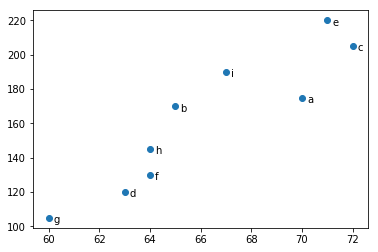

In [17]:
# 각 포인트에 레이블을 달자.
plt.scatter(friends, minutes)
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                xy=(friend_count, minute_count),
                xytext=(5,-5),
                textcoords='offset points')